
📊 Evaluation Metrics:
Mean Absolute Error (MAE): $17,094.92
Root Mean Squared Error (RMSE): $20,225.67


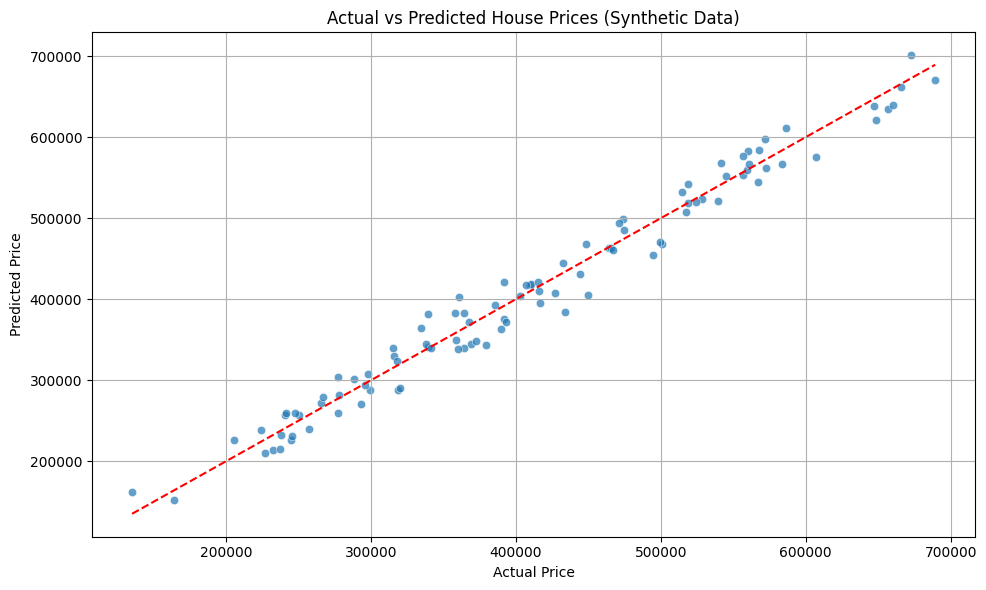

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create a synthetic dataset
np.random.seed(42)
n_samples = 500

square_feet = np.random.randint(500, 3500, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
locations = np.random.choice(['Downtown', 'Suburb', 'Countryside'], n_samples)

# Price formula (random noise + location effect)
base_price = 50000 + square_feet * 150 + bedrooms * 10000
location_effect = {
    'Downtown': 75000,
    'Suburb': 30000,
    'Countryside': -15000
}
price = base_price + np.array([location_effect[loc] for loc in locations]) + np.random.normal(0, 20000, n_samples)

# Assemble into a DataFrame
df = pd.DataFrame({
    'square_feet': square_feet,
    'bedrooms': bedrooms,
    'location': locations,
    'price': price
})

# Train-test split
X = df[['square_feet', 'bedrooms', 'location']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numerical = ['square_feet', 'bedrooms']
categorical = ['location']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n📊 Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices (Synthetic Data)')
plt.grid(True)
plt.tight_layout()
plt.show()
